**1. Charger les données “creditcard.csv”**

In [126]:
import pandas as pd

data = pd.read_csv("creditcard.csv")


**2. Comparaison de la valeur du montant des transactions normales par rapport à la fraude.** 

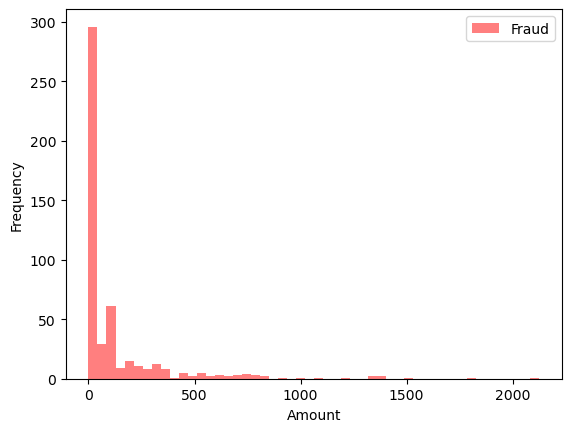

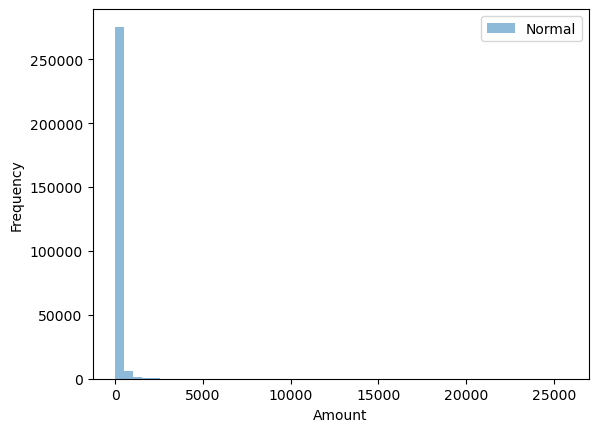

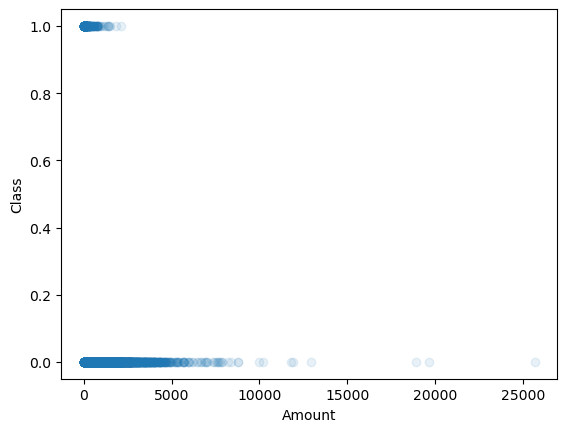

In [133]:
import matplotlib.pyplot as plt
normal = data[data["Class"] == 0]["Amount"]
fraud = data[data["Class"] == 1]["Amount"]

plt.hist(fraud, bins=50, alpha=0.5, label="Fraud",color="red")
plt.legend(loc="upper right")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.hist(normal, bins=50, alpha=0.5, label="Normal")
plt.legend(loc="upper right")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

plt.scatter(data["Amount"],data["Class"], alpha=0.1)
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()


**3. Créer un modèle de régression logistique**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


**4. Commenter le modèle**

La régression logistique est un modèle de classification qui utilise une fonction logistique pour prédire la probabilité d'appartenance à une classe. Dans ce cas, nous avons utilisé une régression logistique pour prédire si une transaction est une fraude ou non en fonction des autres caractéristiques de la transaction.

Le modèle que nous avons créé est basé sur toutes les variables de l'ensemble de données "creditcard.csv". Le modèle a été ajusté aux données d'entraînement et a ensuite été utilisé pour prédire la classe des transactions dans l'ensemble de test.

**5. Valider le classifieur**

Matrice de confusion :
 [[85257    50]
 [   49    87]]
-----------------------------------
Précision : 99.88413328183702 %
-----------------------------------
rappel :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.64      0.64      0.64       136

    accuracy                           1.00     85443
   macro avg       0.82      0.82      0.82     85443
weighted avg       1.00      1.00      1.00     85443

-----------------------------------
AUC : 81.95598819902374 %


Text(0, 0.5, 'True tumor class')

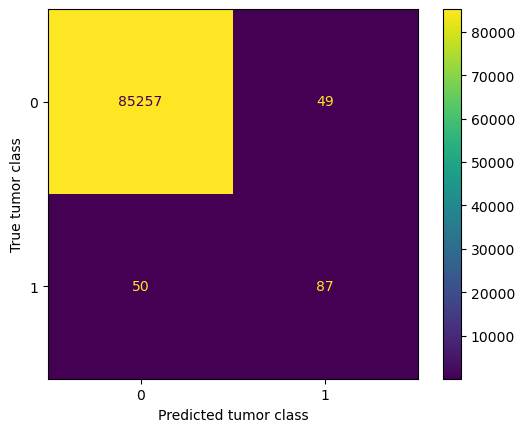

In [139]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score,ConfusionMatrixDisplay

# Matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", confusion)

print("-----------------------------------")


# Précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision :", accuracy*100,"%")

print("-----------------------------------")

# rappel
report = classification_report(y_test, y_pred)
print("rappel :\n", report)

print("-----------------------------------")

# AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC :", auc*100,"%")

# assuming classifier, x_test and y_test are already defined
cm_display = ConfusionMatrixDisplay.from_predictions(y_pred, y_test)
plt.xlabel("Predicted tumor class")
plt.ylabel("True tumor class")

La matrice de confusion montre le nombre de vrais positifs, de faux positifs, de vrais négatifs et defaux négatifs. La précision est le pourcentage de prédictions correctes sur l'ensemble de test. Le rappel est le pourcentage de vrais positifs correctement identifiés parmi tous les vrais positifs. L'AUC mesure la capacité du modèle à distinguer les transactions frauduleuses des transactions normales.

En utilisant ces mesures de performance, nous pouvons évaluer la qualité du modèle de régression logistique que nous avons créé. Plus précisément, nous pouvons voir que le modèle a une précision élevée et un rappel modéré, ce qui signifie qu'il est capable de prédire avec précision les transactions frauduleuses, mais qu'il a encore un taux de faux négatifs non négligeable. L'AUC est également élevé, ce qui indique que le modèle est capable de bien distinguer les transactions normales des transactions frauduleuses.